In [5]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, circuit_drawer,plot_histogram
import numpy as np

In [6]:
#Figure 1 et 2
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte NOT (X) sur le premier qubit
circuit.x(0)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename="not.png")

# Exécution du circuit sur un simulateur quantique
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

# Visualisation de la sphère d'état des deux qubits
plot_bloch_multivector(statevector).savefig("not_sphere.png")


In [7]:
#Figure 3,4,5
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte Hadamard sur le premier qubit
circuit.h(0)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='h.png')
# Exécution du circuit sur un simulateur quantique
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

# Visualisation de la sphère d'état des deux qubits
plot_bloch_multivector(statevector).savefig("hadamard_sphere.png")

# Visualisation de l'histogramme des résultats de mesure
plot_histogram(result.get_counts(circuit),filename="hadamard_histogram.png")



In [18]:
#Figure 6 et 7
#Création du circuit à un qubit
circuit = QuantumCircuit(1)

# Angle de rotation (π/4)
theta = np.pi/4

# Visualisation de la sphère d'état avant l'application de la porte ROTX
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector).savefig("before_rotx.png")

# Application de la porte ROTX(π/4) sur le qubit 0
circuit.rx(theta, 0)

# Visualisation de la sphère d'état après l'application de la porte ROTX
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector).savefig("after_rotx.png")

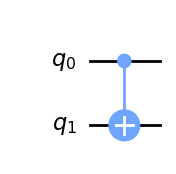

In [20]:
#Figure 8
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte CNOT (CX) avec le premier qubit comme contrôle et le deuxième qubit comme cible
circuit.cx(0, 1)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='cnot.png')


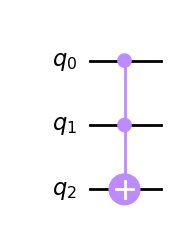

In [21]:
#Figure 9
# Création du circuit à trois qubits
circuit = QuantumCircuit(3)

# Application de la porte Toffoli (CCX) avec les deux premiers qubits comme contrôles et le troisième qubit comme cible
circuit.ccx(0, 1, 2)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='toffoli.png')

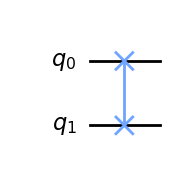

In [22]:
#Figure 10
# Création du circuit à deux qubits
circuit = QuantumCircuit(2)

# Application de la porte Swap
circuit.swap(0, 1)

# Visualisation du circuit
circuit_drawer(circuit, output='mpl', filename='swap.png')

In [23]:
#Figure 11 et 12
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT

state = "000"

mycircuit = QuantumCircuit(len(state))
mycircuit.initialize(Statevector.from_label(state).data, mycircuit.qubits[::-1])

#print(f"Base de calcul |{state}>")
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data).savefig('calcul_base.png'))

#print(f"Base de Fourier |{state}>")
mycircuit.append(QFT(len(state), do_swaps=False), mycircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(mycircuit).data).savefig('fourier_base.png'))


Base de calcul |000>


None

Base de Fourier |000>


None